# Lab 2a: Trees

Lab associated with Module 2a: Trees

***

In [8]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [9]:
import numpy as np

Following libraries have to be installed on your computer. Try to install graphviz by using: conda install python-graphviz

I made use of some of the following links to get rid of errors:
    
https://github.com/quadram-institute-bioscience/albatradis/issues/7

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

https://github.com/xflr6/graphviz/issues/68

https://github.com/RedaOps/ann-visualizer/issues/12


On my mac computer I had to install some packages using brew to get rid of following error: "ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH"

brew install graphviz

In [10]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Testing Visualization Package

Let us test this visualization Digraph Pacakge, it is only a tool for displaying tree or graph, this will come handy as it helps to visualize our solution.

In [11]:
dot = Digraph()

dot.node("1")
dot.node("2")
dot.edges(['12'])

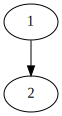

In [12]:
dot

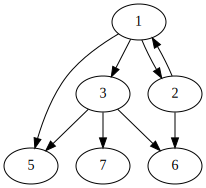

In [13]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')
dot.node('6')
dot.node('7')

# Add edges
dot.edges(['12', '13', '35', '15', '21', '37', '36', '26'])

# Visualize the graph
dot

***

### Section 2: Creating a Binary Search Tree

Let us start by creating a BST

We will keep code simple in the sense that we will make a node class, and then build functions outside the class to implement various functionality.

In [14]:
class Node:
    
    def __init__(self, value):

        self.val = value
        self.right = None
        self.left = None


def buildBinaryTree(nodes):
    
    if len(nodes) == 0:
        raise ValueError('list is empty')
        
    return binaryTree(nodes, 0, len(nodes) - 1)
        
def binaryTree(nodes, start, end):
    
    if start > end:
        return
    
    middle = (start + end) // 2
    root = Node(nodes[middle])
    root.left = binaryTree(nodes, start, middle - 1)
    root.right = binaryTree(nodes, middle + 1, end)
    
    return root

In [15]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8]
test2 = [-1, 0, 9, 10]

In [16]:
test1_tree = buildBinaryTree(test1)
test2_tree = buildBinaryTree(test2)

We will make the simpler assumption that all the keys are unique when we are inserting

In [17]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

In [18]:
test3_tree = buildBinaryTree(test3)

Okay now that we have build three trees, let us visualize them. For visualization, we will have to write another function.

In [19]:
def visualize_tree(tree):
    
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

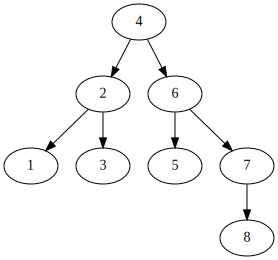

In [20]:
dot = visualize_tree(test1_tree)

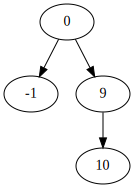

In [21]:
dot = visualize_tree(test2_tree)

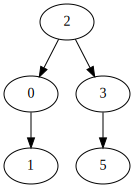

In [22]:
dot = visualize_tree(test3_tree)

***

### Section 3: Implementing
, Insert and Delete Operations

Let us implement IDS operations on the BST we have built

Search operation should look like:

In [1]:
def search(nodes, val):

    if val == nodes.val:
        return True

    if val < nodes.val:
        
        if nodes.left == None:
            return False

        return search(nodes.left, val)

    elif val >= nodes.val:
        
        if nodes.right == None:
            return False

        return search(nodes.right, val)

In [24]:
search(test3_tree, 3)

True

In [25]:
search(test1_tree, 18)

False

Let us write insert function now:

In [26]:
def insert(nodes, val):

    # Empty Tree
    if nodes == None:
        nodes = Node(val)
        return

    # Value already exist on the node
    if nodes.val == val:
        return

    if val < nodes.val:

        if nodes.left == None: 
            nodes.left = Node(val)
            return
        else:
            insert(nodes.left, val)
            return

    elif val >= nodes.val:
        
        if nodes.right == None:
            nodes.right = Node(val)
            return
        else:
            insert(nodes.right, val)
            return

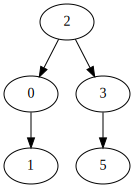

In [27]:
test3 = [0, 1, 2, 3, 3, 3, 5]
test3 = np.unique(test3)

test3_tree = buildBinaryTree(test3)
dot = visualize_tree(test3_tree)

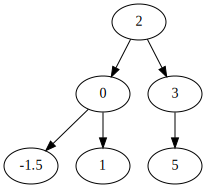

In [28]:
insert(test3_tree, -1.5)
dot = visualize_tree(test3_tree)

Let us write delete opertion. We will write another function minValueNode as well.

In [29]:
def minValueNode(node):
    current = node
 
    # loop down to find the leftmost leaf
    while(current.left is not None):
        current = current.left
 
    return current

def delete(nodes, val):

    if nodes == None:  
        return nodes

    if val < nodes.val:
        
        #if nodes.left:
        nodes.left = delete(nodes.left, val)

    elif val > nodes.val:
        
        #if nodes.right:
        nodes.right = delete(nodes.right, val)

    else:
        
        # Node with only one child or no child
        
        if nodes.left is None:
            temp = nodes.right
            nodes = None
            return temp
        elif nodes.right is None:
            temp = nodes.left
            nodes = None
            return temp
        
        # Nodes with two children: Get the inorder successor
        temp = minValueNode(nodes.right)
        
        nodes.val = temp.val
        
        nodes.right = delete(nodes.right, temp.val)
        
    return nodes

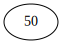

In [30]:
test3_tree = buildBinaryTree([50])
dot = visualize_tree(test3_tree)

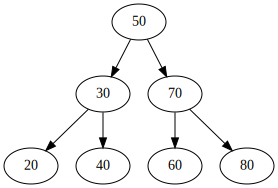

In [31]:
insert(test3_tree, 50)
insert(test3_tree, 30)
insert(test3_tree, 20)
insert(test3_tree, 40)
insert(test3_tree, 70)
insert(test3_tree, 60)
insert(test3_tree, 80)
dot = visualize_tree(test3_tree)

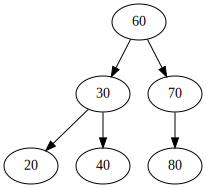

In [32]:
delete(test3_tree, 50)
dot = visualize_tree(test3_tree)

***

### <font color='red'> Section 4: Now that you have a good understanding of BST, write an algorithm (and code) to check if a binary search tree is balanced. For the purpose of this question, a balanced tree is defined to be a tree such that the heights of the two subtrees of any node never differs by more than one. </font>

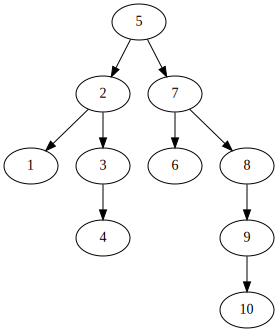

Tree is not balanced


In [37]:
### TODO ###
### Good Luck ###
"""
Python3 program to check if a tree is height-balanced
"""
# function to find height of binary tree
def height(root):

	# base condition when binary tree is empty
	if root is None:
		return 0
	return max(height(root.left), height(root.right)) + 1

# function to check if tree is height-balanced or not
def isBalanced(root):

	# Base condition
	if root is None:
		return True

	# for left and right subtree height
	lh = height(root.left)
	rh = height(root.right)

	# allowed values for (lh - rh) are 1, -1, 0
	if (abs(lh - rh) <= 1) and isBalanced(root.left) is True and isBalanced( root.right) is True:
		return True

	# if we reach here means tree is not
	# height-balanced tree
	return False

# Driver function to test the above function
test4 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
test4_tree = buildBinaryTree(test4)
insert(test4_tree, 10)
dot = visualize_tree(test4_tree)

if isBalanced(test4_tree):
	print("Tree is balanced")
else:
	print("Tree is not balanced")

# This code is contributed by Shweta Singh









***

### <font color='red'> Section 5: Write an algorithm (and code) to find the first common ancestor of two nodes in a binary search tree. </font>

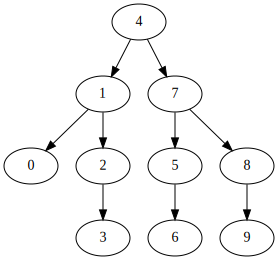

[4, 7, 5, 6] [4, 7, 8, 9]
7


In [43]:
#### TODO ####
### Good Luck ###
def findPath(root, path, k):

    # Baes Case
    if root is None:
        return False

    # Store this node is path vector. The node will be
    # removed if not in path from root to k
    path.append(root.val)

    # See if the k is same as root's key
    if root.val == k :
        return True

    # Check if k is found in left or right sub-tree
    if root.val < k and root.right is not None:
        if findPath(root.right, path, k):
            return True
    if root.val > k and root.left is not None:
        if findPath(root.left, path, k):
            return True
    # If not present in subtree rooted with root, remove root from path and return False
    path.pop()
    return False

def findLCA(root, n1, n2):

    # To store paths to n1 and n2 fromthe root
    path1 = []
    path2 = []

    # Find paths from root to n1 and root to n2.
    # If either n1 or n2 is not present , return -1
    if not findPath(root, path1, n1) or not findPath(root, path2, n2):
        return -1

    print(path1, path2)
    # Compare the paths to get the first different value
    i = 0
    while i < len(path1) and i < len(path2):
        if path1[i] != path2[i]:
            break
        i += 1
    return path1[i-1]

test5 = [i for i in range(10)]
test5_tree = buildBinaryTree(test5)
dot = visualize_tree(test5_tree)

ret = findLCA(test5_tree, 6, 9)
if ret == -1:
    print("Don't find")
else:
    print(ret)






***

### <font color='red'> Section 6: Write an algorithm (and code) to perform a left and right rotation on any specified node of a BST? Your function should take in the tree, as well as a node as input argument, and then return a tree in which rotation is performed. </font>

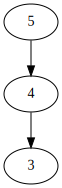

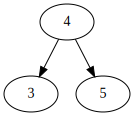

In [56]:
#### TODO ####
### Good Luck ###
def leftRotate(node):
    if node.right is None:
        return
    y = node.right
    T2 = y.left

    # Perform rotation
    y.left = node
    node.right = T2
    return y

def rightRotate(node):
    if node.left is None:
        return
    y = node.left
    T3 = y.right

    # Perform rotation
    y.right = node
    node.left = T3

    # Return the new root
    return y

test6_tree = buildBinaryTree([5])
insert(test6_tree, 4)
insert(test6_tree, 3)
dot = visualize_tree(test6_tree)
test6_tree = rightRotate(test6_tree)
dot = visualize_tree(test6_tree)




    






***

### Section 6: Insertion in an AVL Tree

In [44]:
class TreeNode(object):

    def __init__(self, val):
        
        self.val = val
        self.left = None
        self.right = None
        self.height = 1

class AVL_Tree(object):
 
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key):
     
        # Step 1 - Perform normal BST
        if not root:
            return TreeNode(key)
        elif key < root.val:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < root.left.val:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.val:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > root.left.val:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.val:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 


In [63]:
myTree = AVL_Tree()
root = None
 
root = myTree.insert(root, 10)
root = myTree.insert(root, 20)
root = myTree.insert(root, 30)
root = myTree.insert(root, 40)
root = myTree.insert(root, 50)
root = myTree.insert(root, 25)
root = myTree.insert(root, 60)
root = myTree.insert(root, 70)
root = myTree.insert(root, 80)


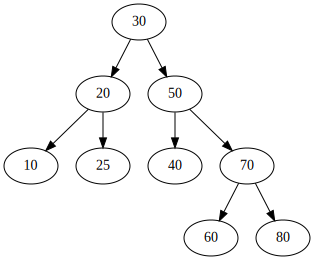

In [64]:
dot = visualize_tree(root)

In [76]:
class RBNode(object):
    """节点类"""
    def __init__(self, data, left_child=None, right_child=None, color='red'):
        self.data = data
        self.parent = None
        self.left_child = left_child
        self.right_child = right_child
        self.color = color


class RBBinaryTree(object):
    """红黑树类"""
    def __init__(self):
        self.__root = None
        self.prefix_branch = '├'
        self.prefix_trunk = '|'
        self.prefix_leaf = '└'
        self.prefix_empty = ''
        self.prefix_left = '─L─'
        self.prefix_right = '─R─'

    def is_empty(self):
        return not self.__root

    @property
    def root(self):
        return self.__root

    @root.setter
    def root(self, value):
        self.__root = value if isinstance(value, RBNode) else RBNode(value)

    def left_rotate(self, node):
        """红黑树左旋"""
        parent_node, right_node = node.parent, node.right_child
        if not right_node:
            return
        # 1.node是旋转节点，将旋转节点的右子节点的左子节点变为旋转节点的右子节点
        node.right_child = right_node.left_child
        if node.right_child:
            node.right_child.parent = node
        # 2.将旋转节点修改为右子节点的左子节点
        right_node.left_child, node.parent = node, right_node
        # 3.将右子节点替换旋转节点的位置，作为旋转节点父节点的子节点
        if not parent_node:
            self.root = right_node
        else:
            if parent_node.left_child == node:
                parent_node.left_child = right_node
            else:
                parent_node.right_child = right_node
        right_node.parent = parent_node

    def right_rotate(self, node):
        """红黑树右旋"""
        parent_node, left_node = node.parent, node.left_child
        if not left_node:
            return
        # 1.node是旋转节点，将旋转节点的左子节点的右子节点变为旋转节点的左子节点
        node.left_child = left_node.right_child
        if node.left_child:
            node.left_child.parent = node
        # 2.将旋转节点修改为左子节点的右子节点
        left_node.right_child, node.parent = node, left_node
        # 3.将左子节点替换旋转节点的位置，作为旋转节点父节点的子节点
        if not parent_node:
            self.root = left_node
        else:
            if parent_node.left_child == node:
                parent_node.left_child = left_node
            else:
                parent_node.right_child = left_node
        left_node.parent = parent_node

    def change_color(self, node):
        """红黑树变色"""
        if node.color == 'red':
            node.color = 'black'
        elif node.color == 'black':
            node.color = 'red'

    def rb_insert(self, value):
        """红黑树插入"""
        node = value if isinstance(value, RBNode) else RBNode(value)
        if self.search(self.root, node.data):
            return
        if self.is_empty():
            node.color = 'black'
            self.root = node
            return
        self.insert(self.root, node)
        factor_node = node
        while True:
            parent_node = factor_node.parent
            if parent_node.color == 'red':
                grandparent_node = parent_node.parent
                if parent_node == grandparent_node.left_child:
                    uncle_node = grandparent_node.right_child
                else:
                    uncle_node = grandparent_node.left_child
                # 如果父节点为红节点且叔节点为黑节点
                if uncle_node is None or uncle_node and uncle_node.color == 'black':
                    if parent_node == grandparent_node.left_child:
                        # 先左旋为左左结果，然后父节点和祖父节点变色，再右旋
                        if factor_node == parent_node.right_child:
                            self.left_rotate(parent_node)
                            self.change_color(factor_node)
                        else:
                            self.change_color(parent_node)
                        self.change_color(grandparent_node)
                        self.right_rotate(grandparent_node)
                    elif parent_node == grandparent_node.right_child:
                        # 先右旋为右右结构，然后父节点和祖父节点变色，再左旋
                        if factor_node == parent_node.left_child:
                            self.right_rotate(parent_node)
                            self.change_color(factor_node)
                        else:
                            self.change_color(parent_node)
                        self.change_color(grandparent_node)
                        self.left_rotate(grandparent_node)
                    break
                # 如果父节点为红节点且叔节点也为红节点
                elif uncle_node and uncle_node.color == 'red':
                    # 父节点和叔节点变色，祖父节点变色(祖父节点是根节点除外)
                    self.change_color(parent_node)
                    self.change_color(uncle_node)
                    if grandparent_node != self.root:
                        self.change_color(grandparent_node)
                        # 祖父节点变成红节点后，将祖父节点作为新的因素节点，判断其父节点，避免不满足特性4
                        factor_node = grandparent_node
            else:
                break

    def insert(self, root, value):
        """二叉搜索树插入节点-递归"""
        node = value if isinstance(value, RBNode) else RBNode(value)
        if self.is_empty():
            self.root = node
            return
        if root is None:
            root = node
        elif node.data < root.data:
            root.left_child = self.insert(root.left_child, value)
            root.left_child.parent = root
        elif node.data > root.data:
            root.right_child = self.insert(root.right_child, value)
            root.right_child.parent = root
        return root

    def rb_delete(self, value):
        """红黑树删除"""
        if not self.is_empty():
            node_delete = self.search(self.root, value)
            if node_delete:
                self._rb_delete(node_delete)
            else:
                raise KeyError("Error, {value} not in this tree".format(value=value))
        else:
            raise KeyError("Error, tree is empty")

    def _rb_delete(self, node):
        """删除节点的三种情况"""
        if node.left_child is None and node.right_child is None:
            self._rb_delete_no_child(node)
        elif node.left_child and not node.right_child or not node.left_child and node.right_child:
            self._rb_delete_one_child(node)
        else:
            rear_node = self.get_min(node.right_child)
            node.data = rear_node.data
            self._rb_delete(rear_node)

    def _rb_delete_no_child(self, node):
        """红黑树删除两个子节点都为空的节点"""
        if node == self.root:
            self.root = None
            self.root.color = 'black'
            return
        factor_node = node
        # 如果待删除节点为黑节点则需要进行调整
        if factor_node.color == 'black':
            while True:
                parent_node = factor_node.parent
                brother_node = parent_node.right_child if factor_node == parent_node.left_child else parent_node.left_child
                # 待删除节点是左子节点
                if factor_node == parent_node.left_child:
                    # 如果兄弟节点是黑节点
                    if brother_node.color == 'black':
                        # 如果兄弟节点没有子节点(递归处理时如果兄弟节点的两个子节点都是黑节点)
                        if brother_node.left_child is None and brother_node.right_child is None or \
                        ((brother_node.left_child and brother_node.left_child.color == 'black') and
                        (brother_node.right_child and brother_node.right_child.color == 'black')):
                            self.change_color(brother_node)
                            if parent_node.color == 'red':
                                self.change_color(parent_node)
                                break
                            else:
                                if parent_node == self.root:
                                    break
                                factor_node = parent_node
                        # 如果兄弟节点有右子节点，此右节点一定是红节点(递归处理时，如果兄弟节点的右子节点为红节点)
                        elif brother_node.right_child is not None and brother_node.right_child.color == 'red':
                            brother_node.color = parent_node.color
                            parent_node.color, brother_node.right_child.color = 'black', 'black'
                            self.left_rotate(parent_node)
                            break
                        # 如果兄弟节点有左节点，此左节点一定是红节点(递归处理时，如果兄弟节点的左子节点为红节点)
                        else:
                            brother_node.color, brother_node.left_child.color = 'red', 'black'
                            self.right_rotate(brother_node)
                    # 如果兄弟节点是红节点
                    elif brother_node.color == 'red':
                        self.change_color(parent_node)
                        self.change_color(brother_node)
                        self.left_rotate(parent_node)
                # 待删除节点是右子节点
                if factor_node == parent_node.right_child:
                    if brother_node.color == 'black':
                        # 如果兄弟节点没有子节点(递归处理时如果兄弟节点的两个子节点都是黑节点)
                        if brother_node.left_child is None and brother_node.right_child is None or \
                        ((brother_node.left_child and brother_node.left_child.color == 'black') and
                        (brother_node.right_child and brother_node.right_child.color == 'black')):
                            self.change_color(brother_node)
                            if parent_node.color == 'red':
                                self.change_color(parent_node)
                                break
                            else:
                                if parent_node == self.root:
                                    break
                                factor_node = parent_node
                        # 如果兄弟节点有左节点，此左节点一定是红节点(递归处理时，如果兄弟节点的左子节点为红节点)
                        elif brother_node.left_child is not None and brother_node.left_child.color == 'red':
                            brother_node.color = parent_node.color
                            parent_node.color, brother_node.left_child.color = 'black', 'black'
                            self.right_rotate(parent_node)
                            break
                        # 如果兄弟节点有右节点，此右节点一定是红节点(递归处理时，如果兄弟节点的右子节点为红节点)
                        else:
                            brother_node.color, brother_node.right_child.color = 'red', 'black'
                            self.left_rotate(brother_node)
                    # 如果兄弟节点是红节点
                    elif brother_node.color == 'red':
                        self.change_color(parent_node)
                        self.change_color(brother_node)
                        self.right_rotate(parent_node)
        if node is node.parent.left_child:
            node.parent.left_child = None
        else:
            node.parent.right_child = None
        node.parent = None

    def _rb_delete_one_child(self, node):
        """红黑树删除有一个子节点的节点"""
        if node.left_child:
            self.change_color(node.left_child)
            if node.parent and node.parent.left_child == node:
                node.left_child.parent, node.parent.left_child = node.parent, node.left_child
            elif node.parent and node.parent.right_child == node:
                node.left_child.parent, node.parent.right_child = node.parent, node.left_child
            else:
                self.root = node.left_child
                node.left_child.parent, node.left_child = None, None
        elif node.right_child:
            self.change_color(node.right_child)
            if node.parent and node.parent.left_child == node:
                node.right_child.parent, node.parent.left_child = node.parent, node.right_child
            elif node.parent and node.parent.right_child == node:
                node.right_child.parent, node.parent.right_child = node.parent, node.right_child
            else:
                self.root = node.right_child
                node.right_child.parent, node.right_child = None, None
        node.parent = None

    def rb_check(self):
        """检查红黑树是否满足5条特性"""
        if self.is_empty():
            print("空树")
            return
        queue = list()
        queue.insert(0, self.root)
        height = 0
        while len(queue):
            node = queue.pop()
            if node.color != "red" and node.color != "black":
                raise Exception("节点{}不满足特性1".format(node.data))
            if node is self.root and node.color != "black":
                raise Exception("节点{}不满足特性2".format(node.data))
            if node.color == "red" and (node.left_child and node.left_child.color == "red" or
                                        node.right_child and node.right_child.color == "red"):
                raise Exception("节点{}不满足特性4".format(node.data))
            if node.left_child is None and node.right_child is None:
                path = 0
                cur = node
                while cur:
                    if cur.color == "black":
                        path += 1
                    cur = cur.parent
                if height and path != height:
                    raise Exception("节点{}不满足特性5".format(node.data))
                else:
                    height = path
            if node.left_child is not None:
                queue.insert(0, node.left_child)
            if node.right_child is not None:
                queue.insert(0, node.right_child)
        print("满足红黑树的5条特性,叶子节点到根节点的非空黑节点个数为{}".format(height))

    def search(self, root, data):
        """二叉搜索树的查询操作"""
        if root is None:
            return
        if root.data == data:
            return root
        elif data < root.data:
            return self.search(root.left_child, data)
        elif data > root.data:
            return self.search(root.right_child, data)

    def get_min(self, root):
        """查找二叉搜索树值最小的节点"""
        if self.is_empty():
            return
        return self.get_min(root.left_child) if root.left_child else root

    def show_tree(self):
        if self.is_empty():
            print('BST is None')
            return
        print('-' * 20)
        print("\033[31m{}\033[0m".format(str(self.root.data))) if self.root.color == 'red' else print(str(self.root.data))
        self.__print_tree(self.__root)
        print('-' * 20)

    def __print_tree(self, node, prefix=None):
        if prefix is None:
            prefix, prefix_left_child = '', ''
        else:
            prefix = prefix.replace(self.prefix_branch, self.prefix_trunk).replace(self.prefix_leaf, self.prefix_empty)
            prefix_left_child = prefix.replace(self.prefix_leaf, self.prefix_empty)
        if self.has_child(node):
            if node.right_child is not None:
                if node.right_child.color == 'red':
                    print(prefix + self.prefix_branch + self.prefix_right + "\033[31m{}\033[0m".format(str(node.right_child.data)))
                else:
                    print(prefix + self.prefix_branch + self.prefix_right + str(node.right_child.data))
                if self.has_child(node.right_child):
                    self.__print_tree(node.right_child, prefix + self.prefix_branch + ' ')
            else:
                print(prefix + self.prefix_branch + self.prefix_right)
            if node.left_child is not None:
                if node.left_child.color == 'red':
                    print(prefix + self.prefix_leaf + self.prefix_left + "\033[31m{}\033[0m".format(str(node.left_child.data)))
                else:
                    print(prefix + self.prefix_leaf + self.prefix_left + str(node.left_child.data))
                if self.has_child(node.left_child):
                    prefix_left_child += '  '
                    self.__print_tree(node.left_child, self.prefix_leaf + prefix_left_child)
            else:
                print(prefix + self.prefix_leaf + self.prefix_left)

    def has_child(self, node):
        return node.left_child is not None or node.right_child is not None




In [79]:
tree = RBBinaryTree()
data = [50, 77, 55, 29, 10, 30, 66, 18, 80, 51, 90]
for i in data:
    tree.rb_insert(i)
tree.show_tree()

tree.rb_delete(66)
tree.show_tree()

# data = range(1000)
# for i in data:
#     tree.rb_insert(i)
# tree.rb_check()
# tree.rb_delete(66)
# print("--- after delete ---")
# tree.rb_check()

--------------------
55
├─R─77
| ├─R─80
| | ├─R─90
| | └─L─
| └─L─66
└─L─29
  ├─R─50
  | ├─R─51
  | └─L─30
  └─L─10
    ├─R─18
    └─L─
--------------------
--------------------
55
├─R─80
| ├─R─90
| └─L─77
└─L─29
  ├─R─50
  | ├─R─51
  | └─L─30
  └─L─10
    ├─R─18
    └─L─
--------------------
